# Natural Language Processing for Text Classification


### In these project With Natural Language Processing in Python, we will learned some the basics of concepts like tokenizing, part-of-speech tagging, stemming, chunking, and named entity recognition. furthermore, we will use the machine learning to rank text  of  a dataset of positive and negative movie reviews.

In [9]:
#1. Import Necessary Libraries
import sys
import nltk
import sklearn
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset

### Now that we have ensured that our libraries are installed correctly, let's load the data set as a Pandas DataFrame. Furthermore, let's extract some useful information such as the column information and class distributions. 

### The data set we will be using comes from the UCI Machine Learning Repository.  It contains over 5000 SMS labeled messages that have been collected for mobile phone spam research. It can be downloaded from the following URL:

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [10]:
import pandas as pd
import numpy as np

# load the dataset of SMS messages
df = pd.read_table('SMSSPamCollection', header=None, encoding='utf-8')

In [11]:
# print useful information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [12]:
# check class distribution
classes = df[0]
print(classes.value_counts())

ham     4825
spam     747
Name: 0, dtype: int64


## 2. Preprocess the Data

### Preprocessing the data is an essential step in natural language process. In the following cells, we will convert our class labels to binary values using the LabelEncoder from sklearn, replace email addresses, URLs, phone numbers, and other symbols by using regular expressions, remove stop words, and extract word stems.  

In [13]:
from sklearn.preprocessing import LabelEncoder

# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

print(Y[:10])

[0 0 1 0 0 1 0 0 1 1]


In [14]:
# store the SMS message data
text_messages = df[1]
print(text_messages[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: 1, dtype: object


## 2.1 Regular Expressions

### Some common regular expression metacharacters - copied from wikipedia

### **^**     Matches the starting position within the string. In line-based tools, it matches the starting position of any line.

### **.**     Matches any single character (many applications exclude newlines, and exactly which characters are considered newlines is flavor-, character-encoding-, and platform-specific, but it is safe to assume that the line feed character is included). Within POSIX bracket expressions, the dot character matches a literal dot. For example, a.c matches "abc", etc., but [a.c] matches only "a", ".", or "c".

### **[ ]**    A bracket expression. Matches a single character that is contained within the brackets. For example, [abc] matches "a", "b", or "c". [a-z] specifies a range which matches any lowercase letter from "a" to "z". These forms can be mixed: [abcx-z] matches "a", "b", "c", "x", "y", or "z", as does [a-cx-z].
### The - character is treated as a literal character if it is the last or the first (after the ^, if present) character within the brackets: [abc-], [-abc]. Note that backslash escapes are not allowed. The ] character can be included in a bracket expression if it is the first (after the ^) character: []abc].

### **[^ ]**   Matches a single character that is not contained within the brackets. For example, [^abc] matches any character other than "a", "b", or "c". [^a-z] matches any single character that is not a lowercase letter from "a" to "z". Likewise, literal characters and ranges can be mixed.

### **$**      Matches the ending position of the string or the position just before a string-ending newline. In line-based tools, it matches the ending position of any line.

### **( )**    Defines a marked subexpression. The string matched within the parentheses can be recalled later (see the next entry, \n). A marked subexpression is also called a block or capturing group. BRE mode requires \( \).

### **\n**     Matches what the nth marked subexpression matched, where n is a digit from 1 to 9. This construct is vaguely defined in the POSIX.2 standard. Some tools allow referencing more than nine capturing groups.

### **\***     Matches the preceding element zero or more times. For example, ab*c matches "ac", "abc", "abbbc", etc. [xyz]* matches "", "x", "y", "z", "zx", "zyx", "xyzzy", and so on. (ab)* matches "", "ab", "abab", "ababab", and so on.

### **{m,n}**  Matches the preceding element at least m and not more than n times. For example, a{3,5} matches only "aaa", "aaaa", and "aaaaa". This is not found in a few older instances of regexes. BRE mode requires \{m,n\}.

In [15]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replace email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [16]:
# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [17]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = processed.str.lower()
print(processed)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in numbr a wkly comp to win fa cup ...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the numbrnd time we have tried numbr c...
5568                  will ü b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: 1, Length: 5572, dtype: object


In [18]:
from nltk.corpus import stopwords
import nltk
nltk.download()

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [19]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

## 3. Generating Features

### Feature engineering is the process of using domain knowledge of the data to create features for machine learning algorithms. In this project, the words in each text message will be our features.  For this purpose, it will be necessary to tokenize each word.  We will use the 1500 most common words as features.

In [20]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [21]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 6579
Most common words: [('numbr', 2648), ('u', 1207), ('call', 674), ('go', 456), ('get', 451), ('ur', 391), ('gt', 318), ('lt', 316), ('come', 304), ('moneysymbnumbr', 303), ('ok', 293), ('free', 284), ('day', 276), ('know', 275), ('love', 266)]


In [22]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [23]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(processed[0])
for key, value in features.items():
    if value == True:
        print(key)

go
jurong
point
crazi
avail
bugi
n
great
world
la
e
buffet
cine
got
amor
wat


In [24]:
# Now lets do it for all the messages
messages = list(zip(processed, Y))

# define a seed for reproducibility
seed = 1
np.random.seed = seed
np.random.shuffle(messages)

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]

In [25]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

In [26]:
print(len(training))
print(len(testing))

4179
1393


## 4. Scikit-Learn Classifiers with NLTK
 ### Now that we have our dataset, we can start building algorithms! Let's start with a simple linear support vector classifier, then expand to other algorithms. We'll need to import each algorithm we plan on using from sklearn.  We also need to import some performance metrics, such as accuracy_score and classification_report.

In [28]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 98.34888729361091


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 94.32878679109835
Decision Tree Accuracy: 97.84637473079684
Random Forest Accuracy: 98.63603732950466
Logistic Regression Accuracy: 98.63603732950466
SGD Classifier Accuracy: 98.56424982053123
Naive Bayes Accuracy: 98.49246231155779
SVM Linear Accuracy: 98.34888729361091


In [30]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 98.34888729361091


In [31]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

In [32]:
# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1220
           1       1.00      0.90      0.95       173

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



predicted     
                  ham spam
actual ham       1220    0
       spam        17  156

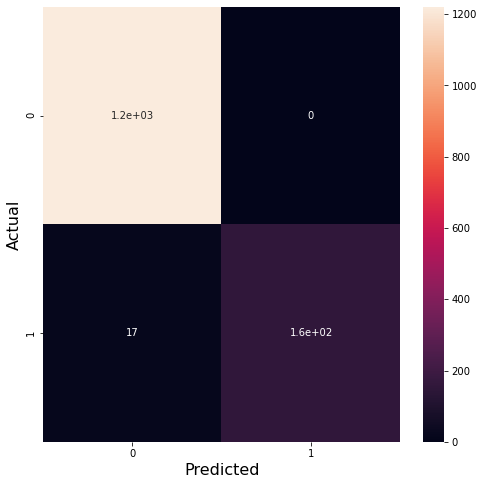

In [33]:
plt.figure(figsize = (8, 8))
cm = confusion_matrix(labels, prediction)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Actual", fontsize=16);